# NEWS CLASSIFICATION 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-news-detection/true.csv
/kaggle/input/fake-news-detection/fake.csv


# Import Packages

This Section Imports all necessary libraries and tools for data processing, visuilization, text analysis, machine learning, and model evaluation. It sets up the environment for the entire project.

In [ ]:
# Core data handling and computation
import pandas as pd  # Data manipulation and analysis
import numpy as np   # Numerical operations

# Visualization libraries
import matplotlib.pyplot as plt  # Plotting and charts
import seaborn as sns  # Enhanced visualizations
from wordcloud import WordCloud  # Text visualization

# Text processing and NLP
import re  # Regular expressions for text cleaning
import nltk  # Natural Language Toolkit
from nltk.corpus import stopwords  # Common words to filter out
from nltk.stem import PorterStemmer  # Word stemming
from nltk.tokenize import word_tokenize  # Text tokenization

# Machine learning utilities
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer  # Text vectorization
from sklearn.model_selection import train_test_split, cross_val_score  # Data splitting & validation
from sklearn.linear_model import LogisticRegression  # Classification algorithm
from sklearn.svm import SVC  # Support Vector Machine classifier
from sklearn.ensemble import RandomForestClassifier  # Ensemble classifier
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                           precision_score, recall_score, f1_score, roc_curve, auc,
                           precision_recall_curve, ConfusionMatrixDisplay)  # Evaluation metrics

# Utilities
from sklearn.pipeline import Pipeline  # ML workflow management
import joblib  # Model saving/loading
import warnings  # Warning control
from tqdm import tqdm  # Progress bars
import time  # Timing operations
from collections import Counter  # Frequency counting

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Download NLTK language resources
nltk.download('stopwords')  # Download stopwords list
nltk.download('punkt')  # Download tokenizer data

# Set visual style for all plots
plt.style.use('ggplot')  # Use ggplot style for matplotlib
sns.set_palette("husl")  # Set color palette for seaborn

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Load & Combine Dataset

Loads the seperate fake and real news datasets, combines them into a single dataframe, adds appropriate labels, and performs initial exploratory analysis to understand the structure and composition of the data.

In [ ]:
# Load both fake and real news datasets from their respective CSV files
fake_df = pd.read_csv('/kaggle/input/fake-news-detection/fake.csv')
real_df = pd.read_csv('/kaggle/input/fake-news-detection/true.csv')

# Add binary labels to each dataset (0 for fake, 1 for real)
fake_df['label'] = 0  # 0 for fake news
real_df['label'] = 1  # 1 for real news

# Combine both datasets into a single dataframe
df = pd.concat([fake_df, real_df], ignore_index=True)

# Shuffle the dataset to randomize order and avoid any sequence bias
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display basic information about the combined dataset
# Shows number of rows and columns
print("Dataset Shape:", df.shape)  

# Preview the first 5 entries
print("\nFirst 5 rows:")
print(df.head())  

# Display data types and memory usage
print("\nDataset Info:")
print(df.info())  

# Check for any missing data
print("\nMissing Values:")
print(df.isnull().sum()) 

# Show balance between fake and real news
print("\nClass Distribution:")
print(df['label'].value_counts()) 

# Show balance between fake and real news
print("\nSubject Distribution:")

# Show topics/categories in the dataset
print(df['subject'].value_counts())  

Dataset Shape: (44898, 5)

First 5 rows:
                                               title  \
0  Ben Stein Calls Out 9th Circuit Court: Committ...   
1  Trump drops Steve Bannon from National Securit...   
2  Puerto Rico expects U.S. to lift Jones Act shi...   
3   OOPS: Trump Just Accidentally Confirmed He Le...   
4  Donald Trump heads for Scotland to reopen a go...   

                                                text       subject  \
0  21st Century Wire says Ben Stein, reputable pr...       US_News   
1  WASHINGTON (Reuters) - U.S. President Donald T...  politicsNews   
2  (Reuters) - Puerto Rico Governor Ricardo Rosse...  politicsNews   
3  On Monday, Donald Trump once again embarrassed...          News   
4  GLASGOW, Scotland (Reuters) - Most U.S. presid...  politicsNews   

                  date  label  
0    February 13, 2017      0  
1       April 5, 2017       1  
2  September 27, 2017       1  
3         May 22, 2017      0  
4       June 24, 2016       1  

Dataset 

# EDA

To explore the dataset through visualizations and statistical summaries. We examine class distribution, text lenght patterns, subject categories and word frequencies to understand the data's sturcture and identify potential patterns or biases.

## Distribution of Labels

Analyse the balance between fake and real news articles in the dataset.

Text(0, 0.5, 'Count')

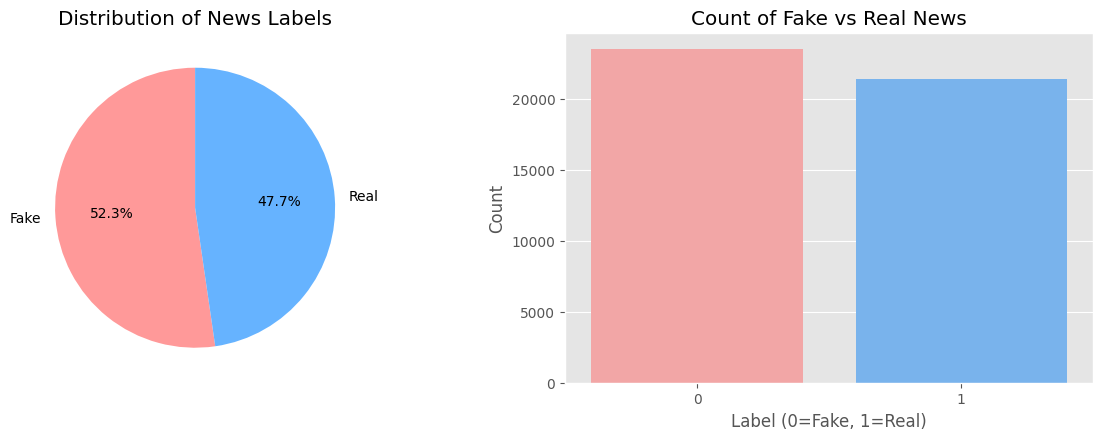

In [ ]:
# Create a figure for our visualizations
plt.figure(figsize=(15, 10))
    
# Pie Chart - Shows percentage distribution
plt.subplot(2, 2, 1)

# Count the number of instances for each label
labels_count = df['label'].value_counts()

# Define colors for visual distinction
colors = ['#ff9999', '#66b3ff']  # Red for fake, blue for real

# Create pie chart with percentages
plt.pie(labels_count.values, labels=['Fake', 'Real'], autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Distribution of News Labels')  # Shows proportion of each class

# Bar Plot - Shows absolute counts
plt.subplot(2, 2, 2)

# Create count plot for categorical visualization
sns.countplot(x='label', data=df, palette=colors)
plt.title('Count of Fake vs Real News')  # Absolute numbers
plt.xlabel('Label (0=Fake, 1=Real)')  # Explain the encoding
plt.ylabel('Count')  # Number of articles

# Display the plots
plt.tight_layout()  # Adjust spacing between subplots
plt.show()

The dataset is very well-balanced

## Subject Distribution

To analyse the distribution of news ariticles across differenct subject categories.

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'politicsNews'),
  Text(1, 0, 'worldnews'),
  Text(2, 0, 'News'),
  Text(3, 0, 'politics'),
  Text(4, 0, 'left-news'),
  Text(5, 0, 'Government News'),
  Text(6, 0, 'US_News'),
  Text(7, 0, 'Middle-east')])

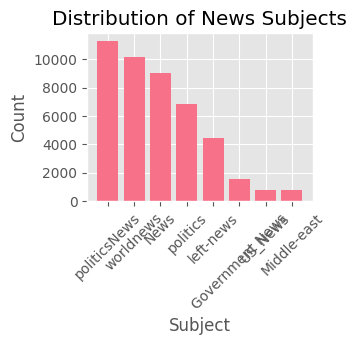

In [ ]:
# Subject Distribution Bar Chart
plt.subplot(2, 2, 3)

# Count occurrences of each subject category
subject_counts = df['subject'].value_counts()

# Create bar chart showing frequency of each subject
plt.bar(subject_counts.index, subject_counts.values)

plt.title('Distribution of News Subjects')  # Shows topic variety in dataset
plt.xlabel('Subject')  # News categories/topics
plt.ylabel('Count')  # Number of articles per subject
plt.xticks(rotation=45)  # Rotate labels for better readability

# Display the plot
plt.tight_layout()  # Ensure proper spacing
plt.show()

## Subject by Label

To analyse how news subjects are distributed across fake and real labels.

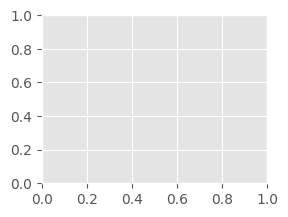

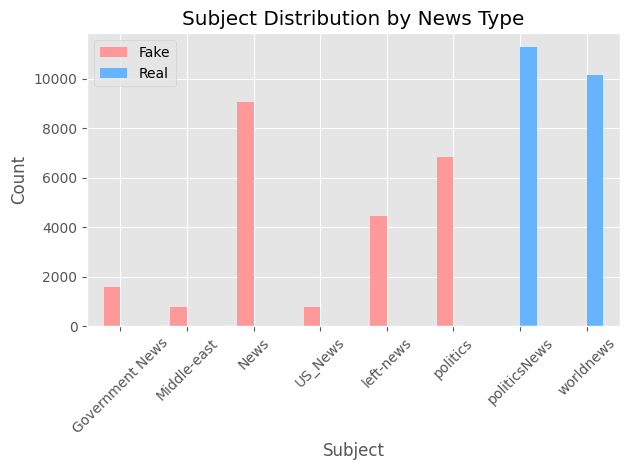

In [ ]:
# Subject Distribution by Label Stacked Bar Chart
plt.subplot(2, 2, 4)

# Create cross-tabulation of subject vs label
subject_label = pd.crosstab(df['subject'], df['label'])

# Plot stacked bar chart showing subject distribution for each label
subject_label.plot(kind='bar', color=colors)  

plt.title('Subject Distribution by News Type')  # Shows topic bias across labels
plt.xlabel('Subject')  # News categories
plt.ylabel('Count')  # Number of articles
plt.xticks(rotation=45)  # Rotate for readability
plt.legend(['Fake', 'Real'])  # Explain the color coding

# Adjust layout and display
plt.tight_layout()
plt.show()

## Text Lenght Analysis

To analyse the distribution of text lenghts for fake vs real news articles.

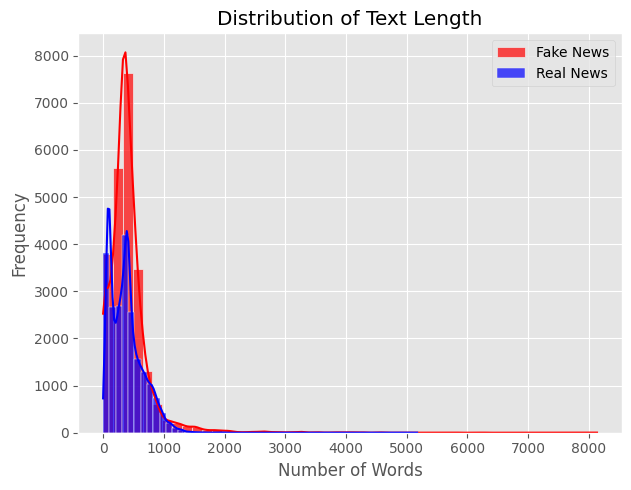

In [ ]:
# Calculate text length for each article (number of words)
df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))

# Create visualization figure
plt.figure(figsize=(12, 5))

# Overlaid Histogram with KDE
plt.subplot(1, 2, 1)

# Plot histogram for fake news (red) with kernel density estimate
sns.histplot(df[df['label'] == 0]['text_length'], color='red', label='Fake News', alpha=0.7, bins=50, kde=True)

# Plot histogram for real news (blue) with kernel density estimate  
sns.histplot(df[df['label'] == 1]['text_length'], color='blue', label='Real News', alpha=0.7, bins=50, kde=True)
plt.title('Distribution of Text Length')  # Compare length distributions
plt.xlabel('Number of Words')  # X-axis word count per article
plt.ylabel('Frequency')  # Y-axis number of articles
plt.legend()  # Show legend

# Adjust layout and display
plt.tight_layout()
plt.show()

## Most Common Words

Processing fake news titles...


Fake Titles: 100%|██████████| 23481/23481 [00:00<00:00, 2895042.54it/s]



Processing real news titles...


Real Titles: 100%|██████████| 21417/21417 [00:00<00:00, 2815704.13it/s]


Counting words in fake titles...


Counting words in real titles...

15 most common words in fake articles: 
trump: 8713
video: 8377
obama: 2487
hillary: 2199
watch: 1905
clinton: 1099
president: 1091
us: 1045
new: 895
breaking: 880
news: 862
black: 860
white: 846
donald: 843
gop: 794

15 most common words in true articles: 
trump: 5411
us: 4033
says: 2981
house: 1443
north: 925
russia: 914
korea: 881
new: 875
white: 815
china: 767
senate: 759
court: 723
bill: 686
clinton: 646
state: 645


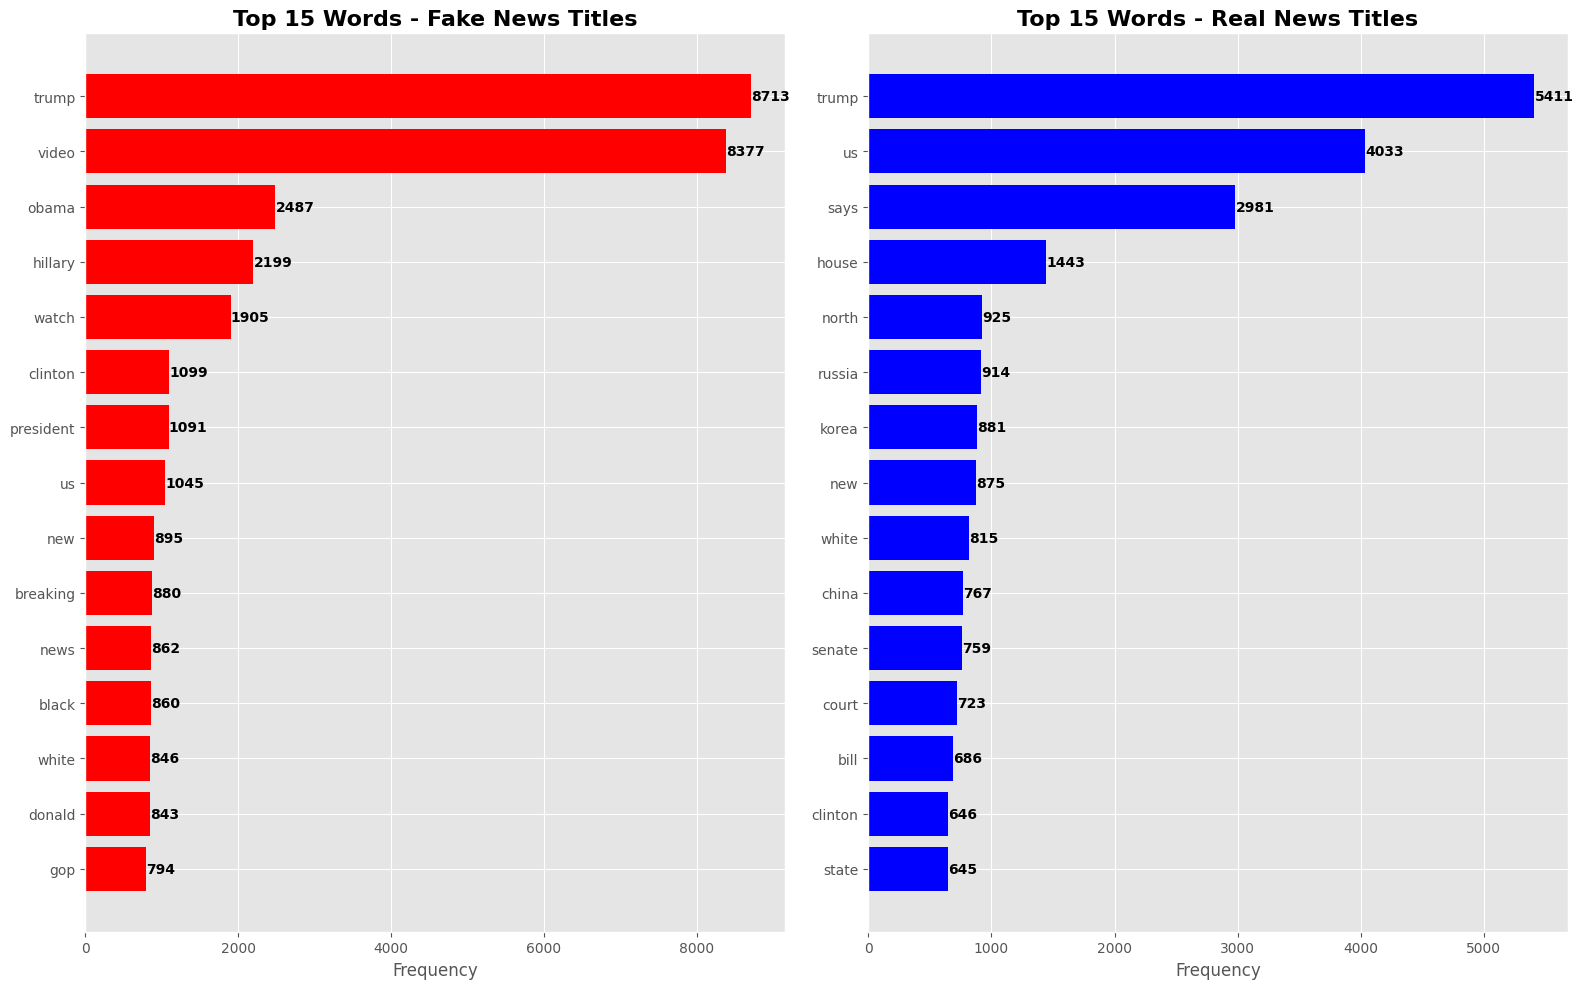

In [ ]:
# Function to clean and count words from text
def count_words(titles):
    # Tokenize text into individual words and convert to lowercase
    words = word_tokenize(titles.lower())

    # Remove non-alphabetical characters using regex
    words = [re.sub(r'[^a-z]', '', word) for word in words]

    # Filter out stopwords and empty strings
    words = [word for word in words if word and word not in stopwords.words('english')]

    # Return frequency count of remaining words
    return Counter(words)

# Separate dataset into fake and real news
fake = df[df['label'] == 0]
true = df[df['label'] == 1]

# Process fake news titles with progress tracking
print("Processing fake news titles...")

# Combine all fake titles into one large string for analysis
fake_titles = " ".join([str(title) for title in tqdm(fake['title'].dropna().tolist(), desc="Fake Titles")])

# Process real news titles with progress tracking  
print("\nProcessing real news titles...")

# Combine all real titles into one large string for analysis
true_titles = " ".join([str(title) for title in tqdm(true['title'].dropna().tolist(), desc="Real Titles")])

# Count words in each category
print("\nCounting words in fake titles...")
fake_count = count_words(fake_titles)

print("Counting words in real titles...")
true_count = count_words(true_titles)

# Extract top 15 most common words from each category
fake_common = fake_count.most_common(15)
true_common = true_count.most_common(15)

# Print results for manual inspection
print("\n15 most common words in fake articles: ")
for word, count in fake_common:
    print(f"{word}: {count}")

print("\n15 most common words in true articles: ")
for word, count in true_common:
    print(f"{word}: {count}")

# Create comparative visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 10))

# Plot fake news words (red bars)
words, counts = zip(*fake_common)
bars1 = ax1.barh(words, counts, color='red')
ax1.set_title('Top 15 Words - Fake News Titles', fontsize=16, fontweight='bold')
ax1.set_xlabel('Frequency', fontsize=12)
ax1.invert_yaxis()  # Display highest frequency at top

# Add value labels to bars
for bar in bars1:
    width = bar.get_width()
    ax1.text(width + 1, bar.get_y() + bar.get_height()/2, 
            f'{int(width)}', ha='left', va='center', fontweight='bold')

# Plot real news words (blue bars)
words, counts = zip(*true_common)
bars2 = ax2.barh(words, counts, color='blue')
ax2.set_title('Top 15 Words - Real News Titles', fontsize=16, fontweight='bold')
ax2.set_xlabel('Frequency', fontsize=12)
ax2.invert_yaxis()  # Display highest frequency at top

# Add value labels to bars
for bar in bars2:
    width = bar.get_width()
    ax2.text(width + 1, bar.get_y() + bar.get_height()/2, 
            f'{int(width)}', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Data Preprocessing

To prepare raw text data for machine learning by cleaning, normalizing and transforming to a structure format.

In [ ]:
# Import tqdm for progress tracking during processing
from tqdm import tqdm

# Define text cleaning and normalization function
def preprocess_text(text):
    # Convert to string and lowercase
    text = str(text).lower()
    
    # Remove special characters, numbers, and punctuation 
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Split text into individual words 
    words = text.split()
    
    # Remove stopwords and very short words 
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words and len(word) > 2]
    
    # Apply stemming 
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    
    # Rejoin words into a single cleaned string
    return ' '.join(words)

# Apply preprocessing to all text data with progress tracking
print("Preprocessing text data...")
tqdm.pandas(desc="Preprocessing text")  # Enable pandas progress bar
df['cleaned_text'] = df['text'].progress_apply(preprocess_text)  # Apply to each row

# Remove any rows with empty cleaned text
df = df.dropna(subset=['cleaned_text'])

# Prepare features (X) and target (y) for model training
X = df['cleaned_text']  # Input features: cleaned text
y = df['label']         # Target variable: 0 (fake) or 1 (real)

# Split data into training and testing sets 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,       # 20% of data for testing
    random_state=42,     # Seed for reproducible splits
    stratify=y           # Maintain same class distribution in both sets
)

# Display dataset sizes after splitting
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

Preprocessing text data...


Preprocessing text: 100%|██████████| 44898/44898 [03:06<00:00, 240.37it/s]


Training set size: 35918
Test set size: 8980


# Feature Extraction

Convert cleaned text data into numerical features for model training. Using TF-IDF vectorization to transform to tranform words into meaningful numerical representations based on their importance in documents and across the corpus.

In [ ]:
# TF-IDF Vectorization Convert text to numerical features
print("Creating TF-IDF features...")

# Initialize TF-IDF vectorizer with specific parameters
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,      # Keep top 5000 most important features (words/ngrams)
    ngram_range=(1, 2),     # Consider single words and word pairs (bigrams)
    min_df=5,               # Ignore terms that appear in fewer than 5 documents
    max_df=0.7              # Ignore terms that appear in more than 70% of documents
)

# Learn vocabulary and transform training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform test data using same vocabulary 
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(f"TF-IDF Feature shape: {X_train_tfidf.shape}") 

Creating TF-IDF features...
TF-IDF Feature shape: (35918, 5000)


# Model Training

Training multiple machine learning models on the processed TF-IDF features to identify the best performing algoithms for news classification.


## Logistric Regression

In [ ]:
print("="*50)
print("TRAINING LOGISTIC REGRESSION MODEL")
print("="*50)

# Initialize and train the model
lr_model = LogisticRegression(random_state=42, max_iter=1000, C=1.0)
lr_model.fit(X_train_tfidf, y_train)

# Make predictions
lr_y_pred = lr_model.predict(X_test_tfidf)
lr_y_pred_proba = lr_model.predict_proba(X_test_tfidf)[:, 1]

# Calculate metrics
lr_accuracy = accuracy_score(y_test, lr_y_pred)
lr_precision = precision_score(y_test, lr_y_pred)
lr_recall = recall_score(y_test, lr_y_pred)
lr_f1 = f1_score(y_test, lr_y_pred)

# Cross-validation
lr_cv_scores = cross_val_score(lr_model, X_train_tfidf, y_train, cv=5, scoring='f1')

print("Logistic Regression Results:")
print(f"Accuracy: {lr_accuracy:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall: {lr_recall:.4f}")
print(f"F1 Score: {lr_f1:.4f}")
print(f"CV F1 Score: {lr_cv_scores.mean():.4f} (±{lr_cv_scores.std():.4f})")
print("\nClassification Report:")
print(classification_report(y_test, lr_y_pred))

# Save the Logistic Regression model
lr_model_filename = 'logistic_regression_model.pkl'
joblib.dump(lr_model, lr_model_filename)
print(f"\nLogistic Regression model saved as {lr_model_filename}")

# save the model with vectorizer as a pipeline for easier deployment
lr_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('classifier', lr_model)
])

lr_pipeline_filename = 'logistic_regression_pipeline.pkl'
joblib.dump(lr_pipeline, lr_pipeline_filename)
print(f"Logistic Regression pipeline saved as {lr_pipeline_filename}")

# Store results
results = {
    'Logistic Regression': {
        'model': lr_model,
        'pipeline': lr_pipeline,
        'accuracy': lr_accuracy,
        'precision': lr_precision,
        'recall': lr_recall,
        'f1': lr_f1,
        'cv_mean': lr_cv_scores.mean(),
        'cv_std': lr_cv_scores.std(),
        'y_pred': lr_y_pred,
        'y_pred_proba': lr_y_pred_proba
    }
}

TRAINING LOGISTIC REGRESSION MODEL
Logistic Regression Results:
Accuracy: 0.9870
Precision: 0.9824
Recall: 0.9904
F1 Score: 0.9864
CV F1 Score: 0.9852 (±0.0017)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4696
           1       0.98      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980


Logistic Regression model saved as logistic_regression_model.pkl
Logistic Regression pipeline saved as logistic_regression_pipeline.pkl


In [ ]:
import pickle

metrics_results = {}
for model_name, model_data in results.items():
    metrics_results[model_name] = {
        'accuracy': model_data['accuracy'],
        'precision': model_data['precision'],
        'recall': model_data['recall'],
        'f1': model_data['f1'],
        'cv_mean': model_data['cv_mean'],
        'cv_std': model_data['cv_std']
    }

# Save the metrics results
metrics_filename = 'model_metrics.pkl'
with open(metrics_filename, 'wb') as f:
    pickle.dump(metrics_results, f)

print(f"Metrics results saved as {metrics_filename}")

Metrics results saved as model_metrics.pkl


## Linear Support Vector Machine

In [20]:
print("="*50)
print("TRAINING LINEAR SVM MODEL")
print("="*50)

from sklearn.svm import LinearSVC

# Initialize and train LinearSVC
print("Training Linear SVM...")
linear_svm = LinearSVC(random_state=42, C=1.0, dual=False, max_iter=1000, verbose = True)
linear_svm.fit(X_train_tfidf, y_train)
print("Training completed!")

# Make predictions
print("Making predictions...")
linear_svm_y_pred = linear_svm.predict(X_test_tfidf)

# Calculate metrics
linear_svm_accuracy = accuracy_score(y_test, linear_svm_y_pred)
linear_svm_precision = precision_score(y_test, linear_svm_y_pred)
linear_svm_recall = recall_score(y_test, linear_svm_y_pred)
linear_svm_f1 = f1_score(y_test, linear_svm_y_pred)

# Cross-validation
print("Performing cross-validation...")
linear_svm_cv_scores = cross_val_score(linear_svm, X_train_tfidf, y_train, cv=5, scoring='f1')

print("Linear SVM Results:")
print(f"Accuracy: {linear_svm_accuracy:.4f}")
print(f"Precision: {linear_svm_precision:.4f}")
print(f"Recall: {linear_svm_recall:.4f}")
print(f"F1 Score: {linear_svm_f1:.4f}")
print(f"CV F1 Score: {linear_svm_cv_scores.mean():.4f} (±{linear_svm_cv_scores.std():.4f})")
print("\nClassification Report:")
print(classification_report(y_test, linear_svm_y_pred))

# Save the Linear SVM model
linear_svm_model_filename = 'linear_svm_model.pkl'
joblib.dump(linear_svm, linear_svm_model_filename)
print(f"\nLinear SVM model saved as {linear_svm_model_filename}")

# Also save the model with vectorizer as a pipeline
linear_svm_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('classifier', linear_svm)
])

linear_svm_pipeline_filename = 'linear_svm_pipeline.pkl'
joblib.dump(linear_svm_pipeline, linear_svm_pipeline_filename)
print(f"Linear SVM pipeline saved as {linear_svm_pipeline_filename}")

# Add to results dictionary
results['Linear SVM'] = {
    'model': linear_svm,
    'pipeline': linear_svm_pipeline,
    'accuracy': linear_svm_accuracy,
    'precision': linear_svm_precision,
    'recall': linear_svm_recall,
    'f1': linear_svm_f1,
    'cv_mean': linear_svm_cv_scores.mean(),
    'cv_std': linear_svm_cv_scores.std(),
    'y_pred': linear_svm_y_pred
}

# Save results to pickle file
import pickle

# Save complete results
results_filename = 'model_LSVM_results.pkl'
with open(results_filename, 'wb') as f:
    pickle.dump(results, f)
print(f"Complete results saved as {results_filename}")


TRAINING LINEAR SVM MODEL
Training Linear SVM...
[LibLinear]iter  1 act 3.146e+04 pre 3.043e+04 delta 1.582e+01 f 3.592e+04 |g| 6.310e+03 CG   5
cg reaches trust region boundary
iter  2 act 2.574e+03 pre 2.237e+03 delta 1.866e+01 f 4.461e+03 |g| 6.983e+02 CG  12
iter  3 act 5.414e+02 pre 4.595e+02 delta 1.866e+01 f 1.887e+03 |g| 2.634e+02 CG  12
iter  4 act 1.341e+02 pre 1.196e+02 delta 1.866e+01 f 1.346e+03 |g| 9.718e+01 CG  13
iter  5 act 2.421e+01 pre 2.287e+01 delta 1.866e+01 f 1.212e+03 |g| 2.694e+01 CG  16
iter  6 act 1.933e+00 pre 1.912e+00 delta 1.866e+01 f 1.187e+03 |g| 7.749e+00 CG  16
iter  7 act 5.874e-02 pre 5.879e-02 delta 1.866e+01 f 1.185e+03 |g| 1.032e+00 CG  18
Training completed!
Making predictions...
Performing cross-validation...
[LibLinear]iter  1 act 2.516e+04 pre 2.435e+04 delta 1.580e+01 f 2.873e+04 |g| 5.048e+03 CG   5
cg reaches trust region boundary
iter  2 act 2.030e+03 pre 1.779e+03 delta 1.842e+01 f 3.575e+03 |g| 5.581e+02 CG  12
iter  3 act 3.958e+02 pre

## Random Forest

In [ ]:
print("="*50)
print("TRAINING RANDOM FOREST MODEL")
print("="*50)

# Show progress while training Random Forest (simulate per-estimator progress)
n_estimators = 100
rf_model = RandomForestClassifier(random_state=42, n_estimators=n_estimators, max_depth=None, verbose=False)

print("\n[INFO] Training Random Forest...")
for i in tqdm(range(1, n_estimators + 1), desc="Training Progress", unit="tree"):
    # Train incrementally by setting n_estimators = i
    temp_model = RandomForestClassifier(
        random_state=42, 
        n_estimators=i, 
        max_depth=None, 
        warm_start=True
    )
    if i == 1:
        temp_model.fit(X_train_tfidf, y_train)
    else:
        temp_model.fit(X_train_tfidf, y_train)

# Final model training
rf_model.fit(X_train_tfidf, y_train)

# Make predictions
rf_y_pred = rf_model.predict(X_test_tfidf)
rf_y_pred_proba = rf_model.predict_proba(X_test_tfidf)[:, 1]

# Calculate metrics
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred)

print("\n[INFO] Running Cross-Validation...")
rf_cv_scores = []
for fold in tqdm(range(5), desc="Cross-Validation Progress", unit="fold"):
    scores = cross_val_score(rf_model, X_train_tfidf, y_train, cv=5, scoring='f1')
    rf_cv_scores.extend(scores)
    time.sleep(0.2)  # just for smoother animation

print("\nRandom Forest Results:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1 Score: {rf_f1:.4f}")
print(f"CV F1 Score: {np.mean(rf_cv_scores):.4f} (±{np.std(rf_cv_scores):.4f})")
print("\nClassification Report:")
print(classification_report(y_test, rf_y_pred))

# Save model
rf_model_filename = 'random_forest_model.pkl'
joblib.dump(rf_model, rf_model_filename)
print(f"\nRandom Forest model saved as {rf_model_filename}")

# Save pipeline
rf_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('classifier', rf_model)
])
rf_pipeline_filename = 'random_forest_pipeline.pkl'
joblib.dump(rf_pipeline, rf_pipeline_filename)
print(f"Random Forest pipeline saved as {rf_pipeline_filename}")

# Save results
results['Random Forest'] = {
    'model': rf_model,
    'pipeline': rf_pipeline,
    'accuracy': rf_accuracy,
    'precision': rf_precision,
    'recall': rf_recall,
    'f1': rf_f1,
    'cv_mean': np.mean(rf_cv_scores),
    'cv_std': np.std(rf_cv_scores),
    'y_pred': rf_y_pred,
    'y_pred_proba': rf_y_pred_proba
}

results_filename = 'model_RF_results.pkl'
with open(results_filename, 'wb') as f:
    pickle.dump(results, f)

print(f"\nResults dictionary saved as {results_filename}")


TRAINING RANDOM FOREST MODEL

[INFO] Training Random Forest...



Training Progress: 100%|██████████| 100/100 [57:26<00:00, 34.47s/tree]



[INFO] Running Cross-Validation...



Cross-Validation Progress: 100%|██████████| 5/5 [20:52<00:00, 250.44s/fold]



Random Forest Results:
Accuracy: 0.9981
Precision: 0.9970
Recall: 0.9991
F1 Score: 0.9980
CV F1 Score: 0.9967 (±0.0009)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4696
           1       1.00      1.00      1.00      4284

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980


Random Forest model saved as random_forest_model.pkl
Random Forest pipeline saved as random_forest_pipeline.pkl

Results dictionary saved as model_RF_results.pkl


# Visualisation of Evaluation Metrics

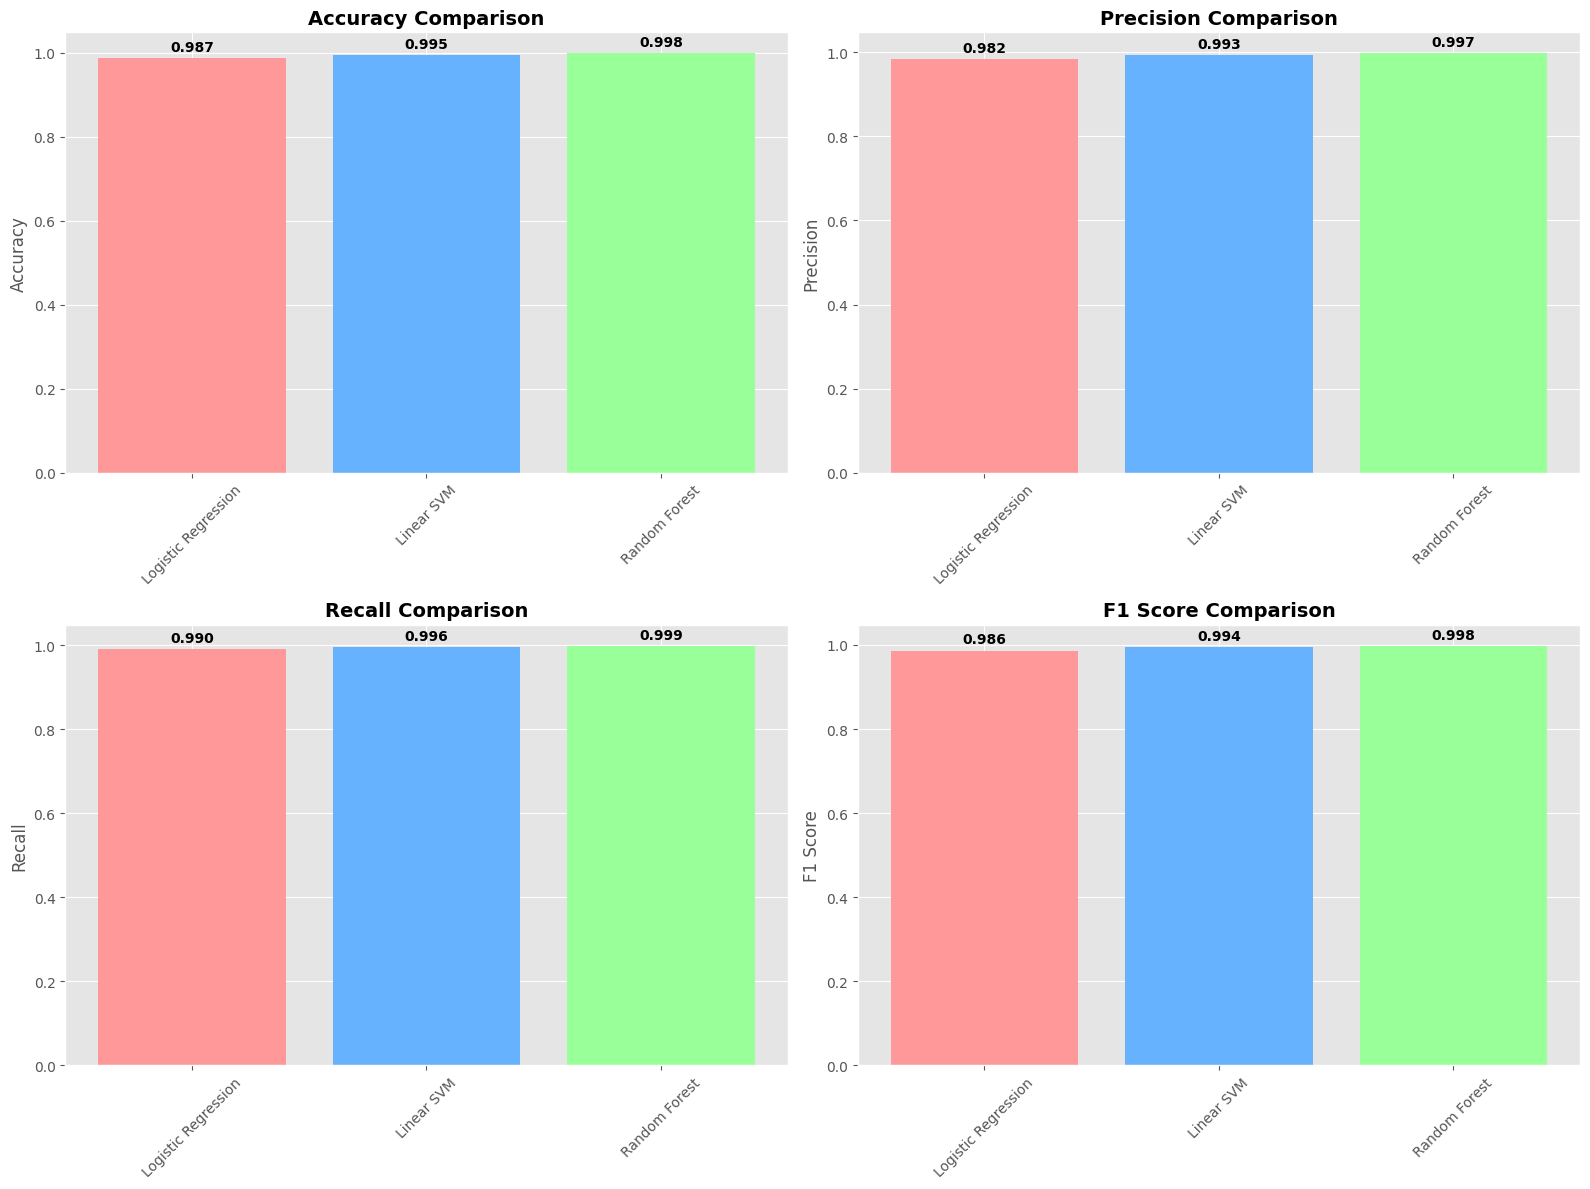

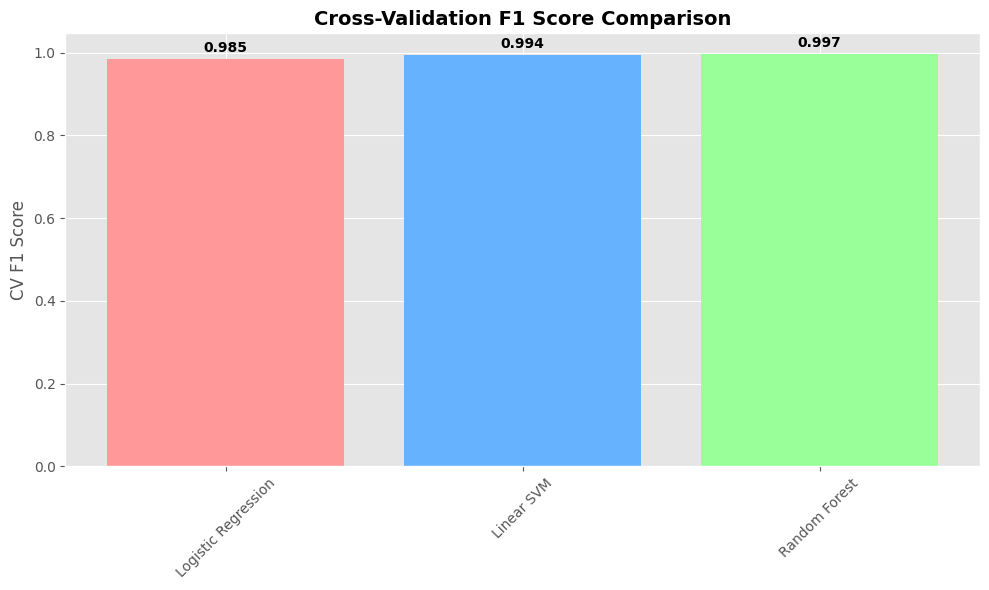

In [26]:
def plot_model_comparison(results):
    # Extract metrics for comparison
    model_names = list(results.keys())
    accuracy_scores = [results[name]['accuracy'] for name in model_names]
    precision_scores = [results[name]['precision'] for name in model_names]
    recall_scores = [results[name]['recall'] for name in model_names]
    f1_scores = [results[name]['f1'] for name in model_names]
    cv_scores = [results[name]['cv_mean'] for name in model_names]
    
    # Create subplots with better spacing
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Bar plot for accuracy
    bars = axes[0, 0].bar(model_names, accuracy_scores, color=['#FF9999', '#66B2FF', '#99FF99'])
    axes[0, 0].set_title('Accuracy Comparison', fontsize=14, fontweight='bold')
    axes[0, 0].set_ylabel('Accuracy')
    axes[0, 0].tick_params(axis='x', rotation=45)
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', fontweight='bold')
    
    # Bar plot for precision
    bars = axes[0, 1].bar(model_names, precision_scores, color=['#FF9999', '#66B2FF', '#99FF99'])
    axes[0, 1].set_title('Precision Comparison', fontsize=14, fontweight='bold')
    axes[0, 1].set_ylabel('Precision')
    axes[0, 1].tick_params(axis='x', rotation=45)
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        axes[0, 1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', fontweight='bold')
    
    # Bar plot for recall
    bars = axes[1, 0].bar(model_names, recall_scores, color=['#FF9999', '#66B2FF', '#99FF99'])
    axes[1, 0].set_title('Recall Comparison', fontsize=14, fontweight='bold')
    axes[1, 0].set_ylabel('Recall')
    axes[1, 0].tick_params(axis='x', rotation=45)
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', fontweight='bold')
    
    # Bar plot for F1 score
    bars = axes[1, 1].bar(model_names, f1_scores, color=['#FF9999', '#66B2FF', '#99FF99'])
    axes[1, 1].set_title('F1 Score Comparison', fontsize=14, fontweight='bold')
    axes[1, 1].set_ylabel('F1 Score')
    axes[1, 1].tick_params(axis='x', rotation=45)
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Create a separate figure for CV scores
    plt.figure(figsize=(10, 6))
    bars = plt.bar(model_names, cv_scores, color=['#FF9999', '#66B2FF', '#99FF99'])
    plt.title('Cross-Validation F1 Score Comparison', fontsize=14, fontweight='bold')
    plt.ylabel('CV F1 Score')
    plt.xticks(rotation=45)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

# Plot model comparison
plot_model_comparison(results)

# Model Comparision & Selection

In [27]:
def compare_models(results):
    # Create a comparison DataFrame
    comparison_df = pd.DataFrame({
        'Model': list(results.keys()),
        'Accuracy': [results[name]['accuracy'] for name in results],
        'Precision': [results[name]['precision'] for name in results],
        'Recall': [results[name]['recall'] for name in results],
        'F1 Score': [results[name]['f1'] for name in results],
        'CV F1 Mean': [results[name]['cv_mean'] for name in results],
        'CV F1 Std': [results[name]['cv_std'] for name in results]
    })
    
    # Sort by F1 score (descending)
    comparison_df = comparison_df.sort_values('F1 Score', ascending=False)
    
    print("Model Comparison:")
    print(comparison_df.to_string(index=False))
    
    # Select the best model based on F1 score
    best_model_name = comparison_df.iloc[0]['Model']
    best_model = results[best_model_name]['model']
    
    print(f"\nBest Model: {best_model_name}")
    print(f"F1 Score: {comparison_df.iloc[0]['F1 Score']:.4f}")
    
    return best_model, best_model_name

# Compare models and select the best one
best_model, best_model_name = compare_models(results)

Model Comparison:
              Model  Accuracy  Precision   Recall  F1 Score  CV F1 Mean  CV F1 Std
      Random Forest  0.998107   0.996972 0.999066  0.998018    0.996706   0.000865
         Linear SVM  0.994655   0.992787 0.996032  0.994407    0.994022   0.000915
Logistic Regression  0.986971   0.982403 0.990430  0.986400    0.985209   0.001716

Best Model: Random Forest
F1 Score: 0.9980


# Test Prediction

In [ ]:
def predict_news(text, model, vectorizer):
    # Preprocess the text
    cleaned_text = preprocess_text(text)
    
    # Transform using the vectorizer
    text_vectorized = vectorizer.transform([cleaned_text])
    
    # Make prediction
    prediction = model.predict(text_vectorized)[0]
    probability = model.predict_proba(text_vectorized)[0]
    
    result = "Fake News" if prediction == 0 else "Real News"
    confidence = probability[0] if prediction == 0 else probability[1]
    
    return result, confidence, probability

# Test the prediction function with some example text
example_text = "BREAKING: Government Secretly Installing Mind Control Devices in COVID Vaccines. In a shocking revelation, anonymous sources within the Pentagon have confirmed that the government is using COVID-19 vaccines to implant microscopic tracking and mind control devices in citizens. These nano-chips, developed by Bill Gates and funded by global elites, can monitor your thoughts and movements 24/7. The devices are activated by 5G towers that have been strategically placed across the country. People who received the vaccine report strange dreams and sudden urges to obey government mandates. One victim reported, After my second dose, I suddenly wanted to eat more vegetables and exercise daily - something I never did before! Doctors who have spoken out against this conspiracy have mysteriously disappeared. The mainstream media is covering up this scandal despite overwhelming evidence. Protect yourself by refusing vaccination and shielding your home with aluminum foil to block 5G signals.Share this urgent news before it gets censored! The truth must be revealed!"
result, confidence, probabilities = predict_news(example_text, best_model, tfidf_vectorizer)
print(f"Prediction: {result}")
print(f"Confidence: {confidence:.4f}")
print(f"Probabilities: [Fake: {probabilities[0]:.4f}, Real: {probabilities[1]:.4f}]")

# Test the prediction function with some example text
real_news_example = "French lawmakers voted to oust Prime Minister François Bayrou Monday, plunging the country into a new political crisis and leaving it without a government at a time of increasing economic strain and geopolitical tensions."
result, confidence, probabilities = predict_news(real_news_example, best_model, tfidf_vectorizer)
print(f"Prediction: {result}")
print(f"Confidence: {confidence:.4f}")
print(f"Probabilities: [Fake: {probabilities[0]:.4f}, Real: {probabilities[1]:.4f}]")

Prediction: Fake News
Confidence: 0.9000
Probabilities: [Fake: 0.9000, Real: 0.1000]
Prediction: Real News
Confidence: 0.6300
Probabilities: [Fake: 0.3700, Real: 0.6300]
